In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as sp
#from scipy.optimize import fsolve
from collections import OrderedDict
from scipy.integrate import odeint

In [2]:
factor_sToGyr= (3.15*10**7)*(10.**9)
G= 6.67*10**-11 # m^3 kg^-1 s^-2
H0= 70./(3.086*10**19) # 1/s
rho_crit= 3.*H0**2/(8.*np.pi*G)  # kg/m^3
t0= 1./H0

In [3]:
def plot(a, t, H0, Gyr= True):
    # t is given in seconds
    if Gyr: t= t/factor_sToGyr   # now in Gyr
    
    plt.clf()
    plt.plot(t, a) # 'o'
    t0= 1/H0  # s
    if Gyr: t0= t0/factor_sToGyr # Gyr
    plt.plot([t0, t0], [0.,2.], label= 'Today')
    plt.legend()
    if Gyr: 
        plt.xlabel('t (Gyr)', fontsize= 12)
        plt.xlim(0, 40)
    else: 
        plt.xlabel('t (s)', fontsize= 12)
    plt.ylabel('a', fontsize= 12)
    plt.show()

In [4]:
# y= [a, adot]
def func(y, t, Omega_M0, Omega_DE0, Omega_rad0, w, H0):
    a, adot= y
    
    Omega_k0= 1.-Omega_M0-Omega_DE0-Omega_rad0
    
    dadt= H0*np.sqrt(Omega_M0*a**-1.+Omega_rad0*a**-2.+Omega_DE0*a**(-3.*w-1.)+Omega_k0)
    
    daSqdtSq= -(H0/2.)*adot*(Omega_M0*a**-3.+2.*Omega_rad0*a**(-4)+(1.+3.*w)*Omega_DE0*a**(-3.*(1.+w)))/(np.sqrt(Omega_M0*a**-3.+Omega_rad0*a**(-4)+Omega_DE0*a**(-3.*(1+w))+ Omega_k0*a**-2.))
    
    dydt= [dadt, daSqdtSq]
    return dydt

In [27]:
def flatCase(Omega_M0, Omega_DE0, Omega_rad0, w, H0):
    #Omega_rad0= 1.-Omega_M0-Omega_DE0
    
    t0= 1/H0  # s
    t0_Gyr= t0/factor_sToGyr  # Gyr
    
    Omega_k0= 1.-Omega_M0-Omega_DE0-Omega_rad0
    
    print 'Omega_k: %s'%(Omega_k0)
    
    a_0= 1.
    dadt_0= H0*np.sqrt(Omega_M0*a_0**-1.+Omega_rad0*a_0**-2.+Omega_DE0*a_0**(-3.*w-1.)+Omega_k0)
    y0 = [a_0, dadt_0]

    # t>t0
    logt= np.arange(np.log10(t0_Gyr),6,.01)
    tpos= 10.**logt  # Gyr
    tpos= tpos*factor_sToGyr  # seconds
    sol = odeint(func, y0, tpos, args=(Omega_M0, Omega_DE0, Omega_rad0, w, H0))
    a_tpos= sol[:, 0]
    adot_tpos= sol[:, 1]
    
    # t<t0
    logt= np.arange(np.log10(t0_Gyr),0.,-.01)
    tneg= 10.**logt  # Gyr
    tneg= tneg*factor_sToGyr  # seconds
    sol = odeint(func, y0, tneg, args=(Omega_M0, Omega_DE0, Omega_rad0, w, H0))
    a_tneg= sol[:, 0]
    adot_tneg= sol[:, 1]
    
    # reverse and combine
    tneg= list(tneg)
    tneg.reverse()
    a_tneg= list(a_tneg)
    a_tneg.reverse()
    adot_tneg= list(adot_tneg)
    adot_tneg.reverse()
    
    t= np.array(tneg+list(tpos))
    a= np.array(a_tneg+list(a_tpos))
    adot= np.array(adot_tneg+list(adot_tpos))
    
    
    return [a, adot, t]

In [28]:
#om, ode, wtest= 1.1, -0.1, -1
#a_test, t_test= flatCase(om, ode, wtest, H0)

In [29]:
Omega_M0, Omega_DE0, Omega_rad0, w= OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()
key= 'Omega_M= 1; Omega_DE= 0; flat'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 1., 0., 0., 0.

key= 'Omega_M= 0.3; Omega_DE= 0.7; w= -1; flat'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0, -1.

key= 'Omega_M= 0.3; Omega_DE= 0.7; w= -2/3; flat'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0., -2./3

key= 'Omega_M= 0.3; Omega_DE= 0.7; w= -4/3; flat'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0.7, 0., -4/3.

key= 'Omega_M= 2.0; Omega_DE= 0.; w= 0.; +curvature'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 2.0, 0., 0., 0.

key= key= 'Omega_M= 0.3; Omega_DE= 0.; w= 0.; -curvature'
Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key]= 0.3, 0., 0., 0.

In [30]:
a, adot, t= OrderedDict(), OrderedDict(), OrderedDict()
for key in w:
    print key
    a[key], adot[key], t[key]= flatCase(Omega_M0[key], Omega_DE0[key], Omega_rad0[key], w[key], H0= H0, )
    print ''

Omega_M= 1; Omega_DE= 0; flat
Omega_k: 0.0

Omega_M= 0.3; Omega_DE= 0.7; w= -1; flat
Omega_k: 0.0

Omega_M= 0.3; Omega_DE= 0.7; w= -2/3; flat
Omega_k: 0.0

Omega_M= 0.3; Omega_DE= 0.7; w= -4/3; flat
Omega_k: 0.0

Omega_M= 2.0; Omega_DE= 0.; w= 0.; +curvature
Omega_k: -1.0

Omega_M= 0.3; Omega_DE= 0.; w= 0.; -curvature
Omega_k: 0.7



/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in double_scalars


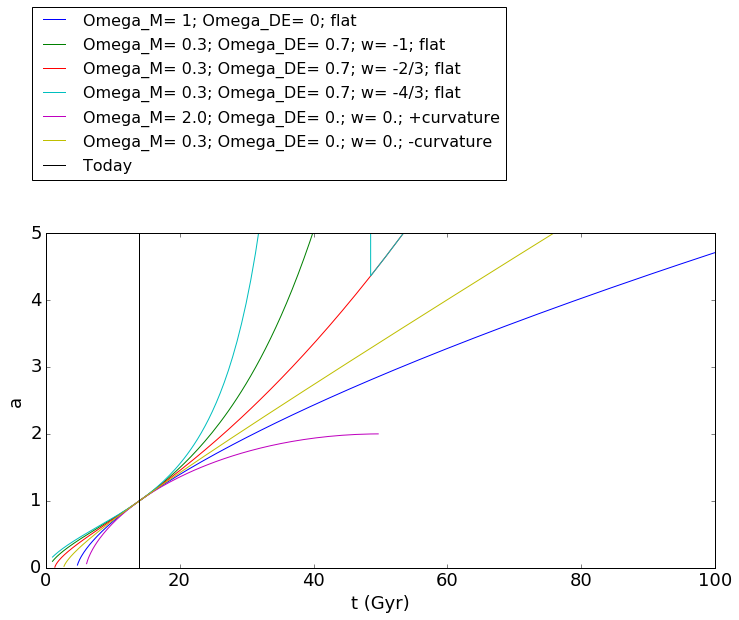

In [40]:
plt.clf()
for key in a:
    tscaled= t[key]/factor_sToGyr   # now in Gyr
    plt.plot(tscaled, a[key], label= key,)

plt.xlim(0, 100)   
plt.ylim(0, 5) 



#plt.xlim(0, 500)   
#plt.ylim(0, 500) 
t0= 1/H0  # s
t0= t0/factor_sToGyr # Gyr
plt.plot([t0, t0], [0.,10.], label= 'Today')
plt.xlabel('t (Gyr)', fontsize= 18)
plt.ylabel('a', fontsize= 18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(fontsize= 16, bbox_to_anchor= (0.7, 1.7))
  
fig= plt.gcf()
fig.set_size_inches(12,6)
plt.show()

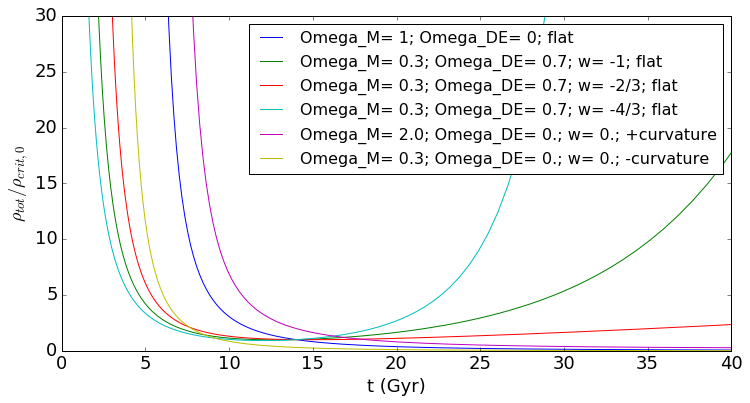

In [10]:
rhoTotal= {}
plt.clf()
for key in a:
    tscaled= t[key]/factor_sToGyr   # now in Gyr
    #Omega_rad0= 1.- Omega_M0[key]- Omega_DE0[key]
    rhoTotal[key]= Omega_M0[key]*a[key]**-3.+ Omega_DE0[key]*a[key]**(-3.*w[key]-1.)+Omega_rad0[key]*a[key]**-4.
    #rhoTotal[key]= rhoTotal[key]*rho_crit
    plt.plot(tscaled, rhoTotal[key], label= key)

plt.xlim(0, 40)   
plt.ylim(0, 30)
t0= 1/H0  # s
t0= t0/factor_sToGyr # Gyr
#plt.plot([t0, t0], [0.,10000.], label= 'Today')
plt.xlabel('t (Gyr)', fontsize= 18)
plt.ylabel(r'$\rho_{tot}/\rho_{crit, 0}$', fontsize= 18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=0, fontsize= 16)
  
fig= plt.gcf()
fig.set_size_inches(12,6)
plt.show()

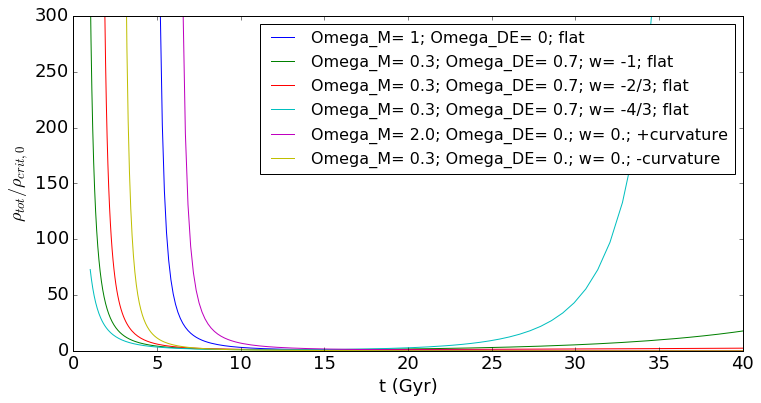

In [11]:
rhoTotal= {}
plt.clf()
for key in a:
    tscaled= t[key]/factor_sToGyr   # now in Gyr
    #Omega_rad0= 1.- Omega_M0[key]- Omega_DE0[key]
    rhoTotal[key]= Omega_M0[key]*a[key]**-3.+ Omega_DE0[key]*a[key]**(-3.*w[key]-1.)+Omega_rad0[key]*a[key]**-4.
    #rhoTotal[key]= rhoTotal[key]*rho_crit
    plt.plot(tscaled, rhoTotal[key], label= key)

plt.xlim(0, 40)   
plt.ylim(0, 300)
t0= 1/H0  # s
t0= t0/factor_sToGyr # Gyr
#plt.plot([t0, t0], [0.,10000.], label= 'Today')
plt.xlabel('t (Gyr)', fontsize= 18)
plt.ylabel(r'$\rho_{tot}/\rho_{crit, 0}$', fontsize= 18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=0, fontsize= 16)
  
fig= plt.gcf()
fig.set_size_inches(12,6)
plt.show()

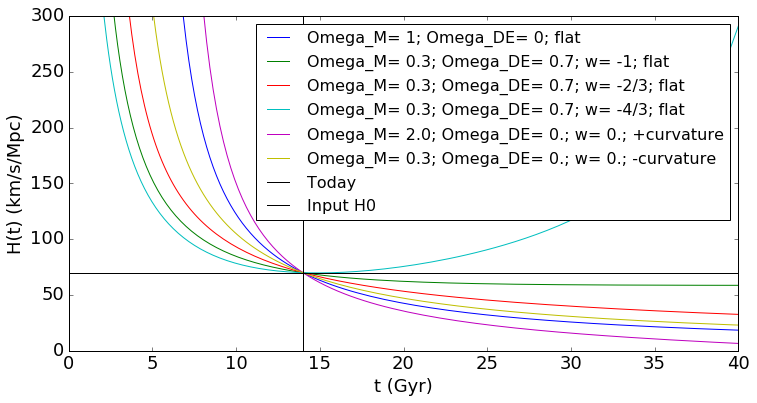

In [12]:
H= {}   # 1/s
plt.clf()
for key in a:
    H[key]= adot[key]/a[key]  # 1/s
    H[key]= H[key]*3.086*10**19
    tscaled= t[key]/factor_sToGyr   # now in Gyr
    plt.plot(tscaled, H[key], label= key)

xMax= 40
plt.xlim(0, xMax)   
plt.ylim(0, 300)
t0= 1/H0  # s
t0= t0/factor_sToGyr # Gyr
plt.plot([t0, t0], [0.,10000.], label= 'Today')
plt.plot([0, xMax], [H0*3.086*10**19, H0*3.086*10**19], 'k', label= 'Input H0')

plt.xlabel('t (Gyr)', fontsize= 18)
plt.ylabel('H(t) (km/s/Mpc)', fontsize= 18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(fontsize= 16, loc=1) #bbox_to_anchor= (1.3,0.7))

fig= plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [13]:
def dt(a, key): 
    Omega_k0= 1.-Omega_M0[key]-Omega_DE0[key]-Omega_rad0[key]
    dadt= H0*np.sqrt(Omega_M0[key]*a**-1.+Omega_rad0[key]*a**-2.+Omega_DE0[key]*a**(-3.*w[key]-1.)+Omega_k0)
    return 1/dadt

In [14]:
for key in adot:
    print 't0 for %s:\n%f (Gyrs)\n'%(key, sp.quad(dt, 0., 1, args= (key,))[0]/factor_sToGyr)

t0 for Omega_M= 1; Omega_DE= 0; flat:
9.330310 (Gyrs)

t0 for Omega_M= 0.3; Omega_DE= 0.7; w= -1; flat:
13.493019 (Gyrs)

t0 for Omega_M= 0.3; Omega_DE= 0.7; w= -2/3; flat:
12.641726 (Gyrs)

t0 for Omega_M= 0.3; Omega_DE= 0.7; w= -4/3; flat:
14.074889 (Gyrs)

t0 for Omega_M= 2.0; Omega_DE= 0.; w= 0.; +curvature:
7.988560 (Gyrs)

t0 for Omega_M= 0.3; Omega_DE= 0.; w= 0.; -curvature:
11.319438 (Gyrs)



In [15]:
t0

13.995464852607709